In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

## part I

In [2]:
df_crsp = pd.read_csv('kw4smgwgvkezomgo.csv.gz', na_values=['C'], parse_dates=['date'])

# The output from WRDS returns a mixed of small and large cap column names.
# We can easily convert everything to small caps.
cols = df_crsp.columns
df_crsp.columns = [c.lower() for c in cols]
df_crsp.drop_duplicates(keep='first',inplace=True)
df_crsp.dropna(inplace=True)
df_crsp.reset_index(inplace=True,drop=True)
df_crsp = df_crsp[df_crsp['exchcd'] == 1.0]
#scd:这个ret导入进来居然是string
df_crsp['ret'] = pd.to_numeric(df_crsp['ret'], errors='coerce')

df_crsp

,permno,date,exchcd,permco,prc,vol,ret,shrout,vwretd,ewretd
0,10006,1926-01-30,1.0,22156,110.250,753.0,0.032732,600.0,0.000561,0.023174
1,10006,1926-02-27,1.0,22156,102.375,342.0,-0.071429,600.0,-0.033046,-0.053510
2,10006,1926-03-31,1.0,22156,96.500,489.0,-0.042735,600.0,-0.064002,-0.096824
3,10006,1926-04-30,1.0,22156,94.000,249.0,-0.025907,600.0,0.037029,0.032975
4,10006,1926-05-28,1.0,22156,96.250,81.0,0.023936,600.0,0.012095,0.001035
...,...,...,...,...,...,...,...,...,...,...
966405,93172,1974-08-30,1.0,699,5.500,1711.0,-0.371429,2495.0,-0.087757,-0.085788
966406,93172,1974-09-30,1.0,699,5.000,582.0,-0.090909,2495.0,-0.109718,-0.079025
966407,93172,1974-10-31,1.0,699,3.125,1137.0,-0.375000,2495.0,0.165584,0.088877
966408,93172,1974-11-29,1.0,699,2.625,1031.0,-0.160000,2929.0,-0.041046,-0.051395


In [3]:
data_1926 = df_crsp[df_crsp['date'].dt.year == 1926]  # 筛选出1926年的数据,这一步是在check有多少上市公司
# 根据 permno 去重，统计公司数量
unique_companies = data_1926['permno'].nunique()
unique_companies

553

In [4]:
df_crsp['prc'] = abs(df_crsp['prc'])#取绝对值

df_crsp

,permno,date,exchcd,permco,prc,vol,ret,shrout,vwretd,ewretd
0,10006,1926-01-30,1.0,22156,110.250,753.0,0.032732,600.0,0.000561,0.023174
1,10006,1926-02-27,1.0,22156,102.375,342.0,-0.071429,600.0,-0.033046,-0.053510
2,10006,1926-03-31,1.0,22156,96.500,489.0,-0.042735,600.0,-0.064002,-0.096824
3,10006,1926-04-30,1.0,22156,94.000,249.0,-0.025907,600.0,0.037029,0.032975
4,10006,1926-05-28,1.0,22156,96.250,81.0,0.023936,600.0,0.012095,0.001035
...,...,...,...,...,...,...,...,...,...,...
966405,93172,1974-08-30,1.0,699,5.500,1711.0,-0.371429,2495.0,-0.087757,-0.085788
966406,93172,1974-09-30,1.0,699,5.000,582.0,-0.090909,2495.0,-0.109718,-0.079025
966407,93172,1974-10-31,1.0,699,3.125,1137.0,-0.375000,2495.0,0.165584,0.088877
966408,93172,1974-11-29,1.0,699,2.625,1031.0,-0.160000,2929.0,-0.041046,-0.051395


In [5]:
from collections import defaultdict

# 假设 new_data 已经加载，并确保 'date' 列是 datetime 类型
df_crsp['date'] = pd.to_datetime(df_crsp['date'])  # 确保日期是datetime格式
#new_data['date'] = pd.to_datetime(new_data['date'])  # 确保日期是datetime格式
# 初始起始年份和月份
start_year = 1926
start_month = 1

# 初始化变量
date = []
valid_firm_number = []
total_number = []
filter_all_data = defaultdict(list)
# 进行16次循环，每次起始时间向后增加3年
for i in range(16):
    sum_valid = 0  # 累计连续85个月的次数
    total_tests = 0  # 总的测试次数
    # 计算当前循环的起始时间
    start_date = pd.Timestamp(year=start_year + i * 3, month=start_month, day=1)
    end_date = start_date + pd.DateOffset(months=85)  # 85个月的截止时间

    #print(f"\n第 {i+1} 次测试: 起始时间 {start_date.date()}")
    date.append(start_date.date())

    # 筛选在当前时间范围内的数据
    filtered_data = df_crsp[(df_crsp['date']>= start_date)]
    #filtered_data = new_data[(new_data['date']>= start_date)]
    grouped_data = filtered_data.groupby('permno').filter(lambda x: (x['date'].iloc[0].year == start_date.year) and (x['date'].iloc[0].month == start_date.month))
    grouped_data = grouped_data.groupby('permno')  # 再次按 permno 分组

    # 遍历每个分组，判断前85个月的连续性
    for idx, group in grouped_data:
        total_tests += 1  # 统计总测试次数  

        # 提取当前分组前85个月的数据
        first_85 = group.head(85).copy()
        #print(first_85.head())        
        first_85['year'] = first_85['date'].dt.year
        first_85['month'] = first_85['date'].dt.month
        first_85['month_number'] = (first_85['year'] - first_85['year'].iloc[0]) * 12 + first_85['month']

        # 判断连续性
        first_85['month_diff'] = first_85['month_number'].diff().fillna(1)
        first_85['is_consecutive'] = first_85['month_diff'] == 1

        if first_85['is_consecutive'].all():
            #print(f"permno {idx}: 前85个月的数据是连续的。")
            sum_valid += 1
            filter_all_data[start_date.date()].append(idx)
        #else:
            #print(f"permno {idx}: 前85个月的数据存在中断。")
    valid_firm_number.append(sum_valid)
    total_number.append(total_tests)

# 计算并输出结果
for i in range(16):
    print(f"起始日期:{date[i]},符合要求公司比例: {valid_firm_number[i] / total_number[i]:.2%},符合要求公司总数: {valid_firm_number[i]}, 有效公司总数: {total_number[i]}")

起始日期:1926-01-01,符合要求公司比例: 70.91%,符合要求公司总数: 351, 有效公司总数: 495
起始日期:1929-01-01,符合要求公司比例: 72.57%,符合要求公司总数: 455, 有效公司总数: 627
起始日期:1932-01-01,符合要求公司比例: 83.79%,符合要求公司总数: 610, 有效公司总数: 728
起始日期:1935-01-01,符合要求公司比例: 91.51%,符合要求公司总数: 647, 有效公司总数: 707
起始日期:1938-01-01,符合要求公司比例: 96.04%,符合要求公司总数: 751, 有效公司总数: 782
起始日期:1941-01-01,符合要求公司比例: 97.22%,符合要求公司总数: 769, 有效公司总数: 791
起始日期:1944-01-01,符合要求公司比例: 97.91%,符合要求公司总数: 795, 有效公司总数: 812
起始日期:1947-01-01,符合要求公司比例: 99.34%,符合要求公司总数: 902, 有效公司总数: 908
起始日期:1950-01-01,符合要求公司比例: 98.48%,符合要求公司总数: 973, 有效公司总数: 988
起始日期:1953-01-01,符合要求公司比例: 97.80%,符合要求公司总数: 1022, 有效公司总数: 1045
起始日期:1956-01-01,符合要求公司比例: 96.87%,符合要求公司总数: 1020, 有效公司总数: 1053
起始日期:1959-01-01,符合要求公司比例: 95.31%,符合要求公司总数: 1016, 有效公司总数: 1066
起始日期:1962-01-01,符合要求公司比例: 96.23%,符合要求公司总数: 1098, 有效公司总数: 1141
起始日期:1965-01-01,符合要求公司比例: 97.79%,符合要求公司总数: 1196, 有效公司总数: 1223
起始日期:1968-01-01,符合要求公司比例: 98.22%,符合要求公司总数: 1216, 有效公司总数: 1238
起始日期:1971-01-01,符合要求公司比例: 94.21%,符合要求公司总数: 1252, 有效公司总数: 1329


In [6]:
#可以通过如下方式筛选出不同起始点所对应的满足连续85个月都有数值的要求的股票，数字为代码 permno
filter_all_data[pd.to_datetime('1926-01-01').date()]

[10030,
 10049,
 10057,
 10065,
 10081,
 10102,
 10110,
 10129,
 10137,
 10145,
 10188,
 10196,
 10209,
 10217,
 10225,
 10233,
 10241,
 10268,
 10305,
 10313,
 10321,
 10356,
 10364,
 10372,
 10399,
 10401,
 10428,
 10436,
 10444,
 10460,
 10487,
 10495,
 10516,
 10524,
 10559,
 10575,
 10583,
 10591,
 10604,
 10612,
 10647,
 10655,
 10671,
 10698,
 10719,
 10743,
 10751,
 10778,
 10786,
 10794,
 10858,
 10874,
 10890,
 10911,
 10938,
 10946,
 10954,
 10970,
 10989,
 10997,
 11009,
 11025,
 11033,
 11041,
 11068,
 11092,
 11105,
 11113,
 11121,
 11148,
 11156,
 11164,
 11172,
 11199,
 11201,
 11252,
 11260,
 11287,
 11295,
 11308,
 11324,
 11340,
 11359,
 11367,
 11391,
 11404,
 11412,
 11447,
 11463,
 11471,
 11498,
 11500,
 11535,
 11543,
 11551,
 11594,
 11607,
 11615,
 11623,
 11658,
 11666,
 11674,
 11682,
 11690,
 11703,
 11711,
 11746,
 11754,
 11762,
 11789,
 11818,
 11834,
 11850,
 11877,
 11885,
 11914,
 11922,
 11930,
 11949,
 11957,
 11965,
 11973,
 11981,
 12001,
 12028,


In [7]:
df_crsp.head()

,permno,date,exchcd,permco,prc,vol,ret,shrout,vwretd,ewretd
0,10006,1926-01-30,1.0,22156,110.250,753.0,0.032732,600.0,0.000561,0.023174
1,10006,1926-02-27,1.0,22156,102.375,342.0,-0.071429,600.0,-0.033046,-0.053510
2,10006,1926-03-31,1.0,22156,96.500,489.0,-0.042735,600.0,-0.064002,-0.096824
3,10006,1926-04-30,1.0,22156,94.000,249.0,-0.025907,600.0,0.037029,0.032975
4,10006,1926-05-28,1.0,22156,96.250,81.0,0.023936,600.0,0.012095,0.001035


## Part II 计算log return 以及benchmark的log return

In [8]:
df_crsp['lret'] = np.log(1 + df_crsp['ret'])
df_crsp['lvwretd'] = np.log(1 + df_crsp['vwretd'])
df_crsp['lewretd'] = np.log(1 + df_crsp['ewretd'])

# Compute the market cap
df_crsp['size'] = df_crsp['shrout'] * df_crsp['prc']

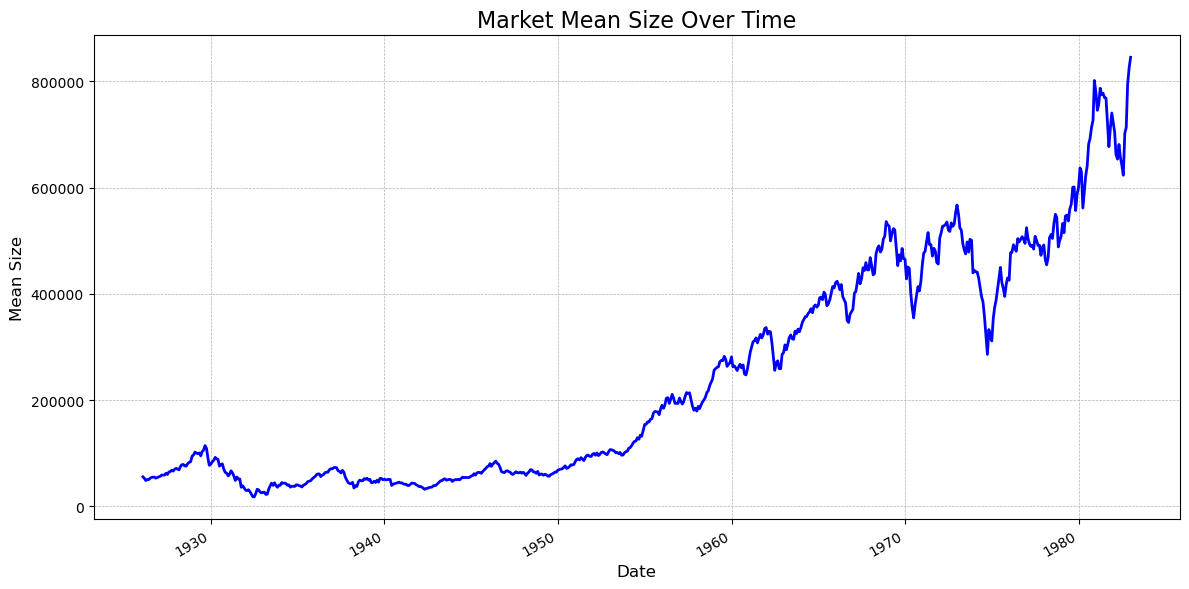

In [20]:
# Calculate and plot the mean size
plt.subplots(figsize=(12, 6))

df_crsp.groupby(['date'])['size'].mean().plot(color='blue', linewidth=2)
# Enhance the plot with grid, intercept, title, and labels
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.title('Market Mean Size Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Size', fontsize=12)

# Show plot with enhancements
plt.tight_layout()
plt.show()

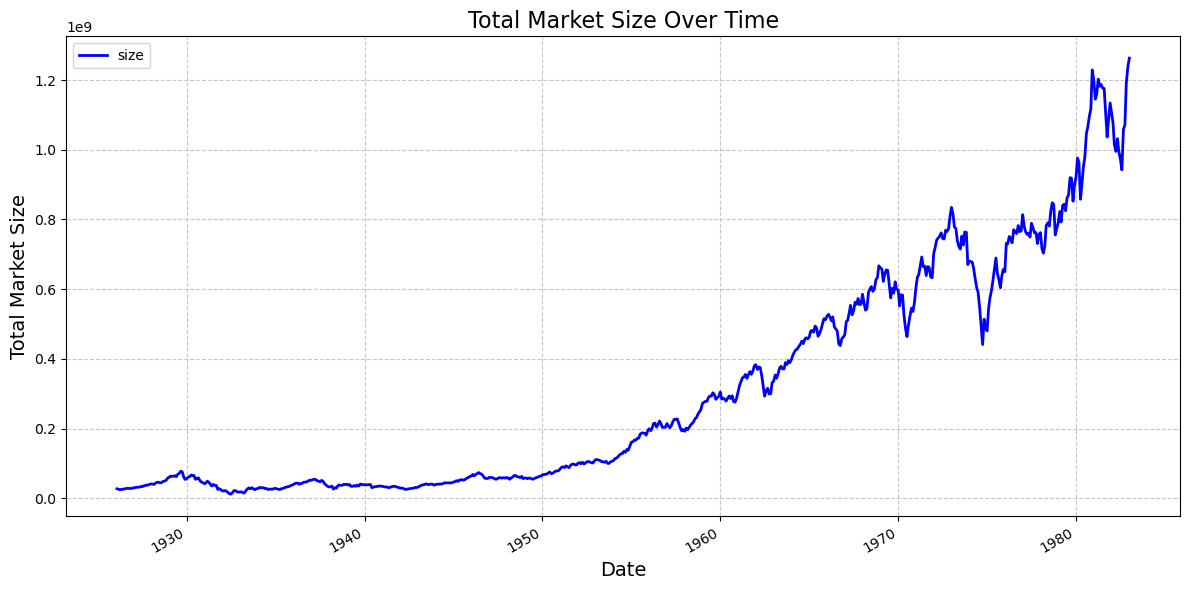

In [21]:
# Plotting total market size over time
fig, ax = plt.subplots(figsize=(12, 6))
df_crsp.groupby(['date'])['size'].sum().plot(color='blue', linewidth=2)

# Enhancing the plot
ax.set_title('Total Market Size Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Total Market Size', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


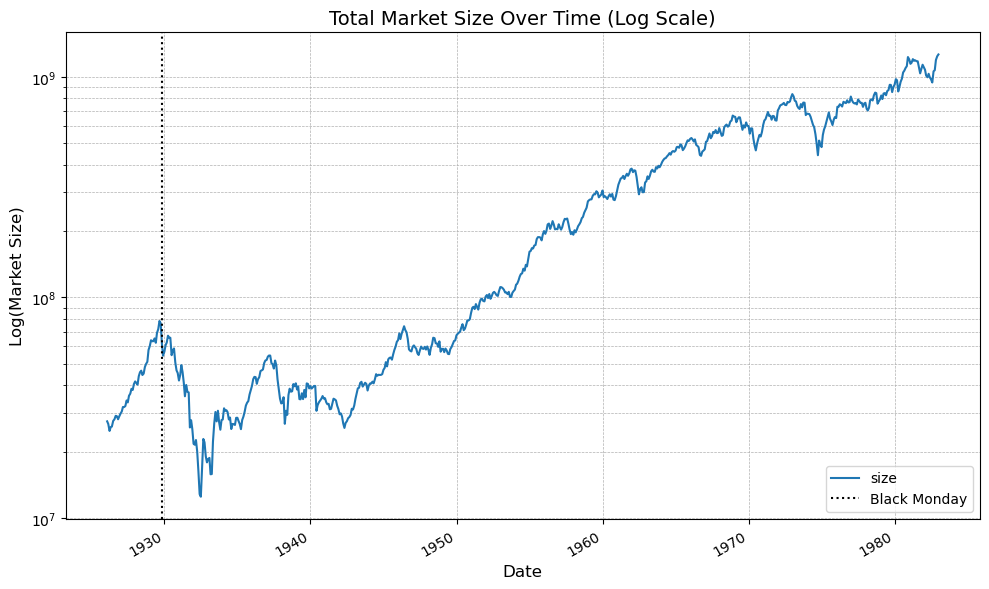

In [22]:

# Plot total market size over time in log scale
fig, ax = plt.subplots(figsize=(10, 6))
df_crsp.groupby(['date'])['size'].sum().plot(logy=True, ax=ax)

# Adding a vertical line for Black Monday
ax.axvline(x=datetime(1929, 10, 24), color='k', linestyle=':', label='Black Monday')

# Enhancing the plot
ax.set_title("Total Market Size Over Time (Log Scale)", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Log(Market Size)", fontsize=12)
ax.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.show()


## Part II

In [23]:
df_crsp = df_crsp.set_index('date')
df_crsp = df_crsp.sort_index()

In [24]:
form_period = 36
hold_period = 36
use_deciles = True
n_stocks = 35
start_date = '1930-01-01'
end_date = '1975-01-01'
benchmark = 'ewretd'
period_start_dates = pd.date_range(start=start_date, end=end_date, freq=str(int(form_period)) + 'MS')
period_start_dates

DatetimeIndex(['1930-01-01', '1933-01-01', '1936-01-01', '1939-01-01',
               '1942-01-01', '1945-01-01', '1948-01-01', '1951-01-01',
               '1954-01-01', '1957-01-01', '1960-01-01', '1963-01-01',
               '1966-01-01', '1969-01-01', '1972-01-01', '1975-01-01'],
              dtype='datetime64[ns]', freq='36MS')

In [25]:
# 计算36个月formation period，构建top bottom portfolio

def compute_performance_portfolios(formation_date, data, formation_period=36, use_deciles=True, n_stocks=35, benchmark='ewretd'):
    """
    Computes the top and bottom portfolios based on stock performance in the formation period prior to the given date.
    
    Parameters:
        formation_date (datetime): The portfolio formation date.
        data (DataFrame): DataFrame containing stock data with required columns like 'log_return', 'log_market_return', etc.
        formation_period (int): The number of months in the formation period.
        use_deciles (bool): Whether to use decile-based grouping or a fixed number of stocks.
        n_stocks (int): The number of top/bottom stocks if not using deciles.
        benchmark (str): The benchmark column name to compute excess returns.
        
    Returns:
        bottom_portfolio (DataFrame): DataFrame containing bottom portfolio stocks and their excess returns.
        top_portfolio (DataFrame): DataFrame containing top portfolio stocks and their excess returns.
    """
    # Define the beginning date of the formation period
    start_date = formation_date - pd.DateOffset(months=formation_period)

    # Filter data for the formation period
    formation_data = data[start_date:formation_date.to_pydatetime()].copy()

    # Group by stock_id and compute total log returns over the formation period
    stock_returns = formation_data.groupby('permno')[['lret', 'lvwretd', 'lewretd']].sum()

    # Compute excess returns based on the chosen benchmark
    stock_returns['lexret'] = stock_returns['lret'] - stock_returns['l' + benchmark]

    # Compute deciles and rankings for excess returns
    stock_returns['decile'] = pd.qcut(stock_returns['lexret'], 10, labels=False)  # (0 = worst, 9 = best)
    stock_returns['rank_asc'] = stock_returns['lexret'].rank()  # (1 = worst return)
    stock_returns['rank_desc'] = stock_returns['lexret'].rank(ascending=False)  # (1 = best return)

    # Select top and bottom portfolios
    if use_deciles:
        top_portfolio = stock_returns[stock_returns['decile'] == 9].reset_index()[['permno', 'lexret']]
        bottom_portfolio = stock_returns[stock_returns['decile'] == 0].reset_index()[['permno', 'lexret']]
    else:
        top_portfolio = stock_returns[stock_returns['rank_desc'] <= n_stocks].reset_index()[['permno', 'lexret']]
        bottom_portfolio = stock_returns[stock_returns['rank_asc'] <= n_stocks].reset_index()[['permno', 'lexret']]

    return bottom_portfolio, top_portfolio


In [29]:
compute_performance_portfolios(period_start_dates[0],df_crsp)[1]

,permno,lexret
0,10014,1.589835
1,10057,1.026640
2,10065,0.679451
3,10102,0.865740
4,10137,1.112032
...,...,...
73,16600,0.676754
74,17873,1.091473
75,18227,0.744477
76,19318,0.681879


In [38]:
portfolios_ten_decile = {}
portfolios_thirtyfive = {}
for date in period_start_dates:
    portfolios_ten_decile[date] = compute_performance_portfolios(date, df_crsp, use_deciles=True, benchmark='ewretd')
    portfolios_thirtyfive[date] = compute_performance_portfolios(date, df_crsp, use_deciles=False, benchmark='ewretd')


得到对于每个16个formation开始时间的top和bottom股票

In [42]:
portfolios_ten_decile[period_start_dates[0]][0].head()

,permno,lexret
0,10081,-2.505710
1,10110,-2.153040
2,10276,-1.690731
3,10348,-1.526504
4,10399,-1.798765


In [41]:
portfolios_thirtyfive[period_start_dates[0]][1].head()

,permno,lexret
0,10014,1.589835
1,10057,1.026640
2,10102,0.865740
3,10137,1.112032
4,10196,1.586383
